# *Игровой магазин. Закономерности успешности*

# Описание проекта

Представлены данные из магазина компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

# Цели работы:

Выявить определяющие успешность игры закономерности, чтобы можно было спланировать рекламные компании.

# Задачи работы:

1. Открыть файл и изучить общую информацию
2. Изменить типы данных в отдельных столбцах, если необходимо
3. Проверить таблицу на пропуски и заполнить их, если возможно
4. Провести исследовательский анализ данных
5. Составить портрет пользователя по каждому региону
6. Проверить статистические гипотезы
7. Написать выводы

# Описание данных:

1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB 

Данные за 2016 год могут быть неполными.

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Названия столбцов начинаются с большой буквы. В следующем пункте работы все названия приведём к привычному нижнему регистру.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обнаружили пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating. 
##### Наши действия:
1. Пропуски в столбцах **name и genre** можем удалить, так как 2 строчки таблицы существенно не повлияют на результат анализа.
2. Пропуски в столбце **year_of_release** нельзя заполнить по имеющейся информации 
3. **critic score** пропуски могли появиться из-за того, что игра вышла только недавно и не набрала достаточного количества голосов для оценки. Возможно, на ресурсе присутствует некий минимальный порог голосов
4. **user_score** - причина может быть той же
5. **rating** - это рейтинг ESRB, которая является организацией, работающей в США и Канаде, поэтому можем предположить, что далеко не все игры попадают под взгляд этой организации.

Ни в одном из трёх последних пунктов не представляется возможным заполнить пропуски. 

Необходимо заменить тип столбца user_score на float, чтобы в дальнейшем можно было проводить с этим столбцом какие-либо операции. Остальные столбцы в порядке.

Взглянем поближе на столбец  user_score

In [5]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обнаружили в столбце "tbd". Вероятно, tbd расшифровывается как to be discovered, то есть рейтинг ещё не был присвоен. А значит маркировка tbd представляет из себя те же пропуски. Можно смело заменить их на NAN.

# Шаг 2. Предобработка данных

In [6]:
# Приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [9]:
# Заменим тип user_score
df['user_score'] = df['user_score'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Посмотрим поближе на строчки с пропущенными жанрами

In [11]:
print(df[df['genre'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Видим две строчки с попусками в имени, рейтинге и в других столбцах. Можно спокойно их удалить, так как они всё равно не информативны.

In [12]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [13]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Добавим суммарные доходы

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [15]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000,16713.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046,0.533315
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, данные подготовлены, приступим к анализу!

</div>

# Шаг 3. Провести исследовательский анализ

Построим, график распредления игр по годам.

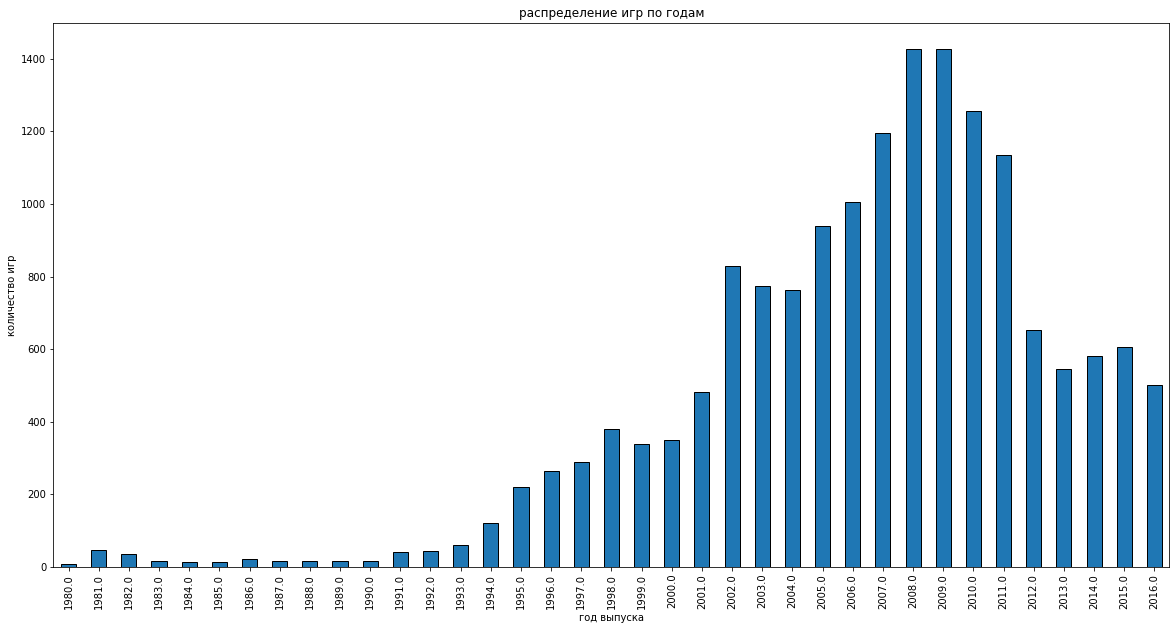

In [16]:
games_in_year = df.groupby('year_of_release')['year_of_release'].count()
games_in_year.plot(kind='bar', figsize=(20, 10), ec='black', title='распределение игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Видим постепенный стабильный рост производства игр , начиная с 1992 года, видим скачок в 1994 и затем в 1995, далее плавный рост  до 2002 года, когда произошёл взлёт в производстве игр. Далее происходил рост скачками в 2005, 2007 и 2008 годах. И после 2009 года наблюдаем спад. В 2011 произошло очень значительное падение и затем рынок находился в примерно одном состоянии без изменений. Для нашего исследования будут важны данные, начиная с 1994 года, так как именнно с него начался сильный рост индустрии.

In [17]:
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
Name: total_sales, Length: 16713, dtype: float64

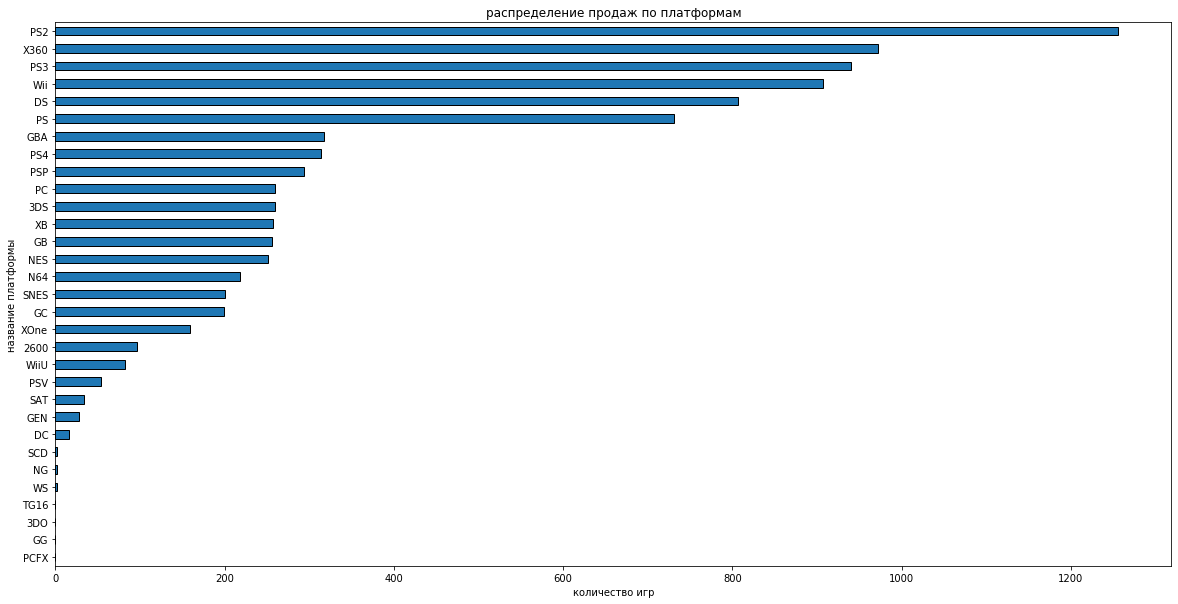

In [18]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values()
top_platforms.plot(kind='barh', figsize=(20, 10), ec='black', title='распределение продаж по платформам')
plt.xlabel('количество игр')
plt.ylabel('название платформы')
plt.show()

Безусловным лидером является PS2, а за ней следуют X360, PS3, Wii, DS, PS

In [19]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

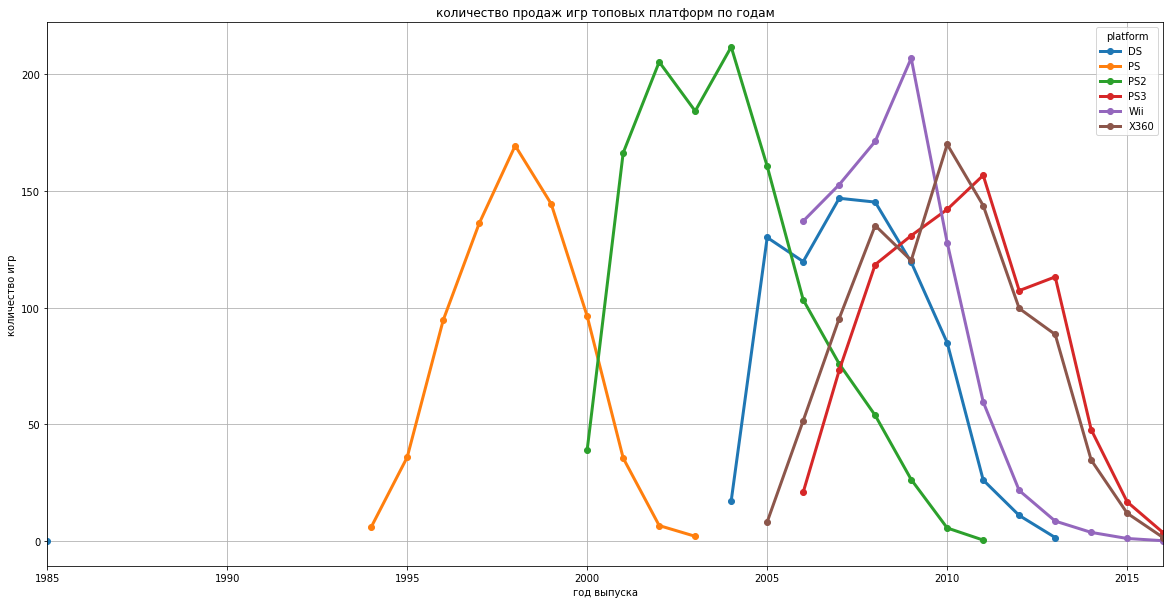

In [20]:
# Составим переменную, содержащую имена главных 10 платформ
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
ax = df.query('platform == @top_platforms')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(style='o-', grid=True, figsize=(20, 10), linewidth=3, title='количество продаж игр топовых платформ по годам')
ax
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Время жизни разных платформ:
1. PS - c 1994 по 2003 - 9 лет
2. PS2 - c 2000 по 2011 - 11 лет
3. DS - c 2004 по 2013 - 9 лет
4. X360 - c 2005 по настоящий момент. Но 2016 год является закатом для платформы - 11 лет
5. Wii - с 2006 по настоящий момент. И опять 2016 является завершающим для платформы - 10 лет
6. Ps3 - 2006-2016 годы - 10 лет.

Мы получили средний срок жизни платформы - 10 лет

Вероятно, будет разумным выбрать **актуальный период** не раньше 2005 года, так как в этот год выходят или скоро выйдут новые актуальные платформы и мы можем заметить рост заинтересованности в играх на графике продаж именно в 2005 году.

In [21]:
# Отбросим в новом датасете строки с годом выпуска ниже 2005
current_df = df[df['year_of_release'] >= 2005]

Какие платформы растут или падают?

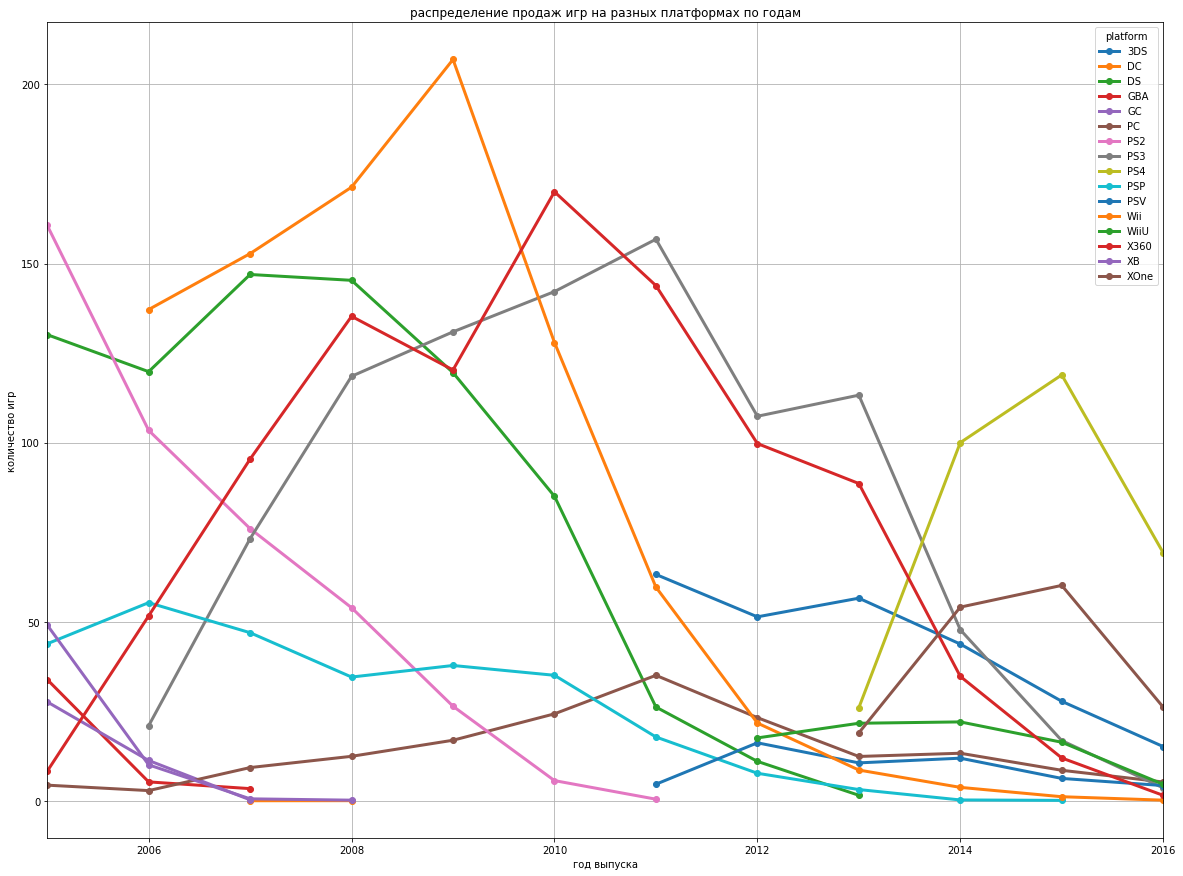

In [22]:
current_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(style='o-', grid=True, figsize=(20, 15), linewidth=3, title='распределение продаж игр на разных платформах по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Актуальными платформами остаются PS4, XOne и  3DS. Причём все платформы, начиная с 2015 года, находятся на спаде, то есть игровой рынок в целом падает.

(0, 2)

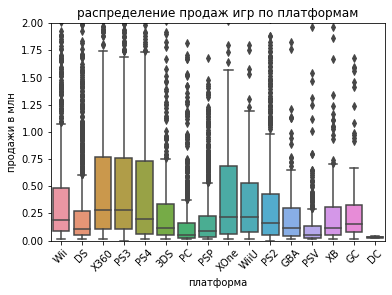

In [23]:
sns.boxplot(x='platform', y='total_sales', data=current_df)
plt.title('распределение продаж игр по платформам')
plt.xticks(rotation=45) 
plt.xlabel('платформа')
plt.ylabel('продажи в млн')
plt.ylim([0,2])

Результаты плохо различимы. Посмотрим поближе

(0, 0.5)

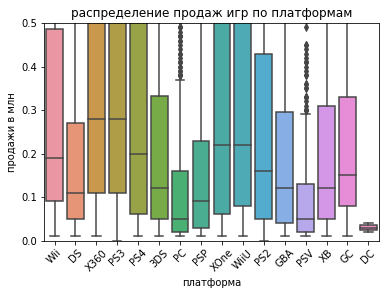

In [24]:
sns.boxplot(x='platform', y='total_sales', data=current_df)
plt.title('распределение продаж игр по платформам')
plt.xticks(rotation=45) 
plt.xlabel('платформа')
plt.ylabel('продажи в млн')
plt.ylim([0,0.5])

Медиана продаж по играм находится в пределах 0.05 - 0.25 миллионов проданных копий. Самая высокая медиана у PS3 и X360 - в районе - 0.28 миллионов копий. У наиболее актуальных платформ - PS 4 - 0.2 миллиона проданных копий, у 3DS  - 0.11, у Xone - 0.22 млн. Можно выделить 3 группы платформ по продажам - 1 группа - игры продаются в тираже 0.05 - 0.25 млн копий, 2 - группа - значения продаж доходят до 0.5 млн копий (Wii, WiiU, PS2) и 3 группа - значения продаж доходят до 0.75 млн копий ( X360, PS3, XONE, PS4)

Посмотрим, как влияют на продажи PS3 отзывы критиков

In [25]:
current_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


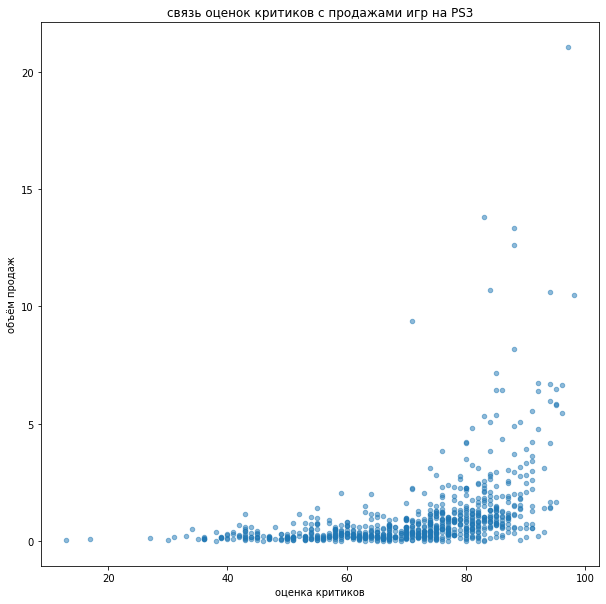

In [26]:
ps3_games = current_df[(current_df['platform'] == 'PS3')]
ps3_games.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 10), alpha=0.5, title='PS3')
plt.title('связь оценок критиков с продажами игр на PS3')
plt.xlabel('оценка критиков')
plt.ylabel('объём продаж')
plt.show()

С увеличением оценок критиков увеличиваются и продажи, хотя более заметное влияние оценок начинается с порогового значения 60.

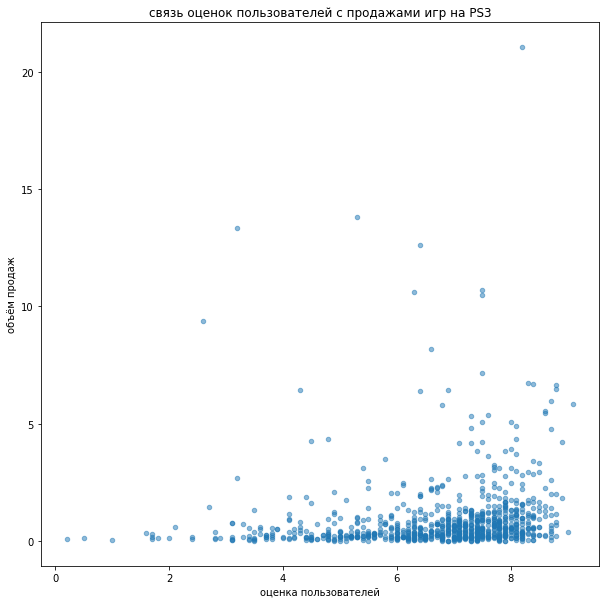

In [27]:
ps3_games.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 10), alpha=0.5, title='PS3')
plt.title('связь оценок пользователей с продажами игр на PS3')
plt.xlabel('оценка пользователей')
plt.ylabel('объём продаж')
plt.show()

В случае связи продаж и оценок пользователей картина похожая, но присутствует больше выбросов.

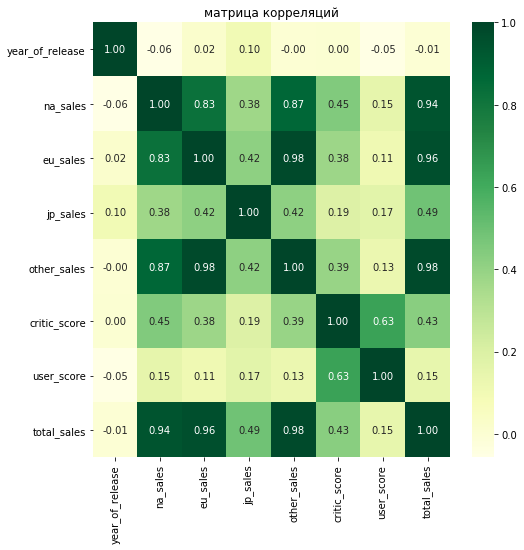

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(ps3_games.dropna().corr(), annot=True, cmap="YlGn",annot_kws={'size':10}, fmt='.2f')
plt.title('матрица корреляций')
plt.show()

Корреляция продаж с оценкой критиков - 0.43 - это слабая корреляция, хотя она значительно выше корреляции продаж с оценкой пользователей - 0.15. Выглядит вполне логично, так как критики зачастую получают игры раньше пользователей и их мнение может склонить к покупке игры на старте продаж.

Соотнесём выводы с другими платформами:

коэффициент корреляции продаж X360 с оценкой критиков равен : 0.39066483136575725
коэффициент корреляции продаж X360 с оценкой потребителей равен: 0.11221112781051602


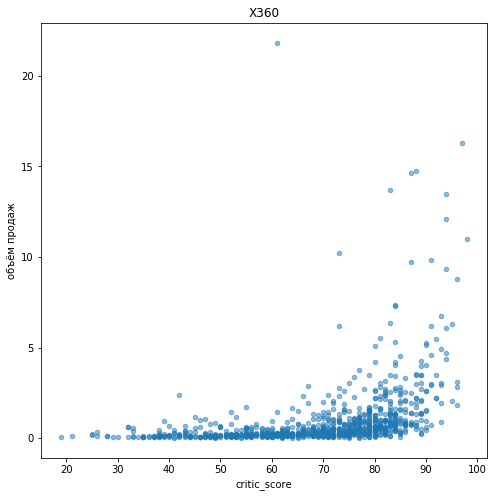

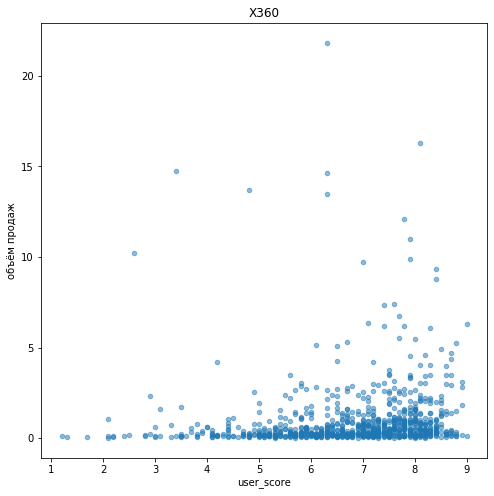

коэффициент корреляции продаж Wii с оценкой критиков равен : 0.17072543984746996
коэффициент корреляции продаж Wii с оценкой потребителей равен: 0.11098055169353915


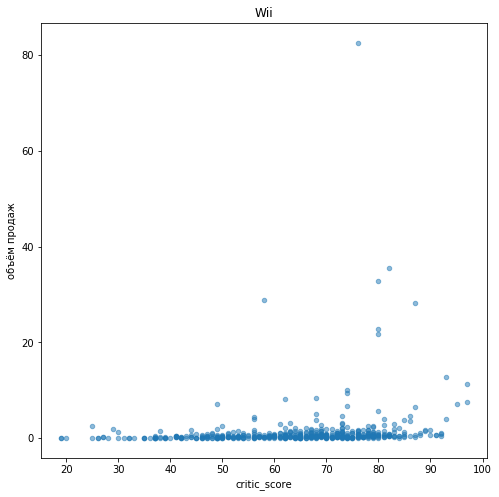

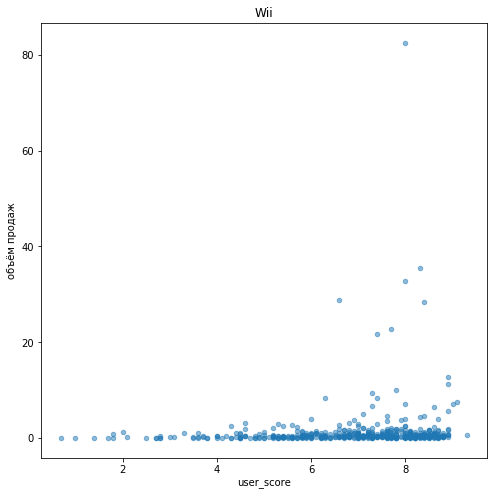

коэффициент корреляции продаж PS2 с оценкой критиков равен : 0.42751094618796015
коэффициент корреляции продаж PS2 с оценкой потребителей равен: 0.18055371249941285


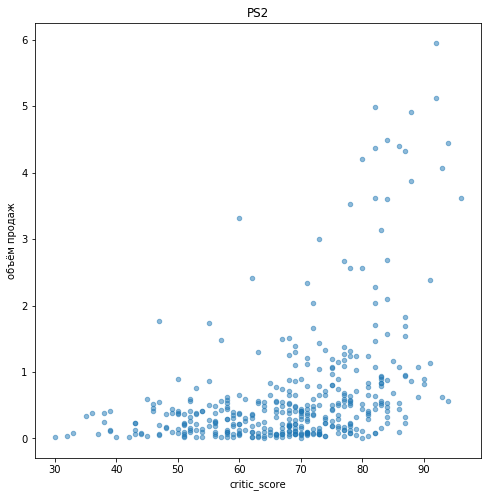

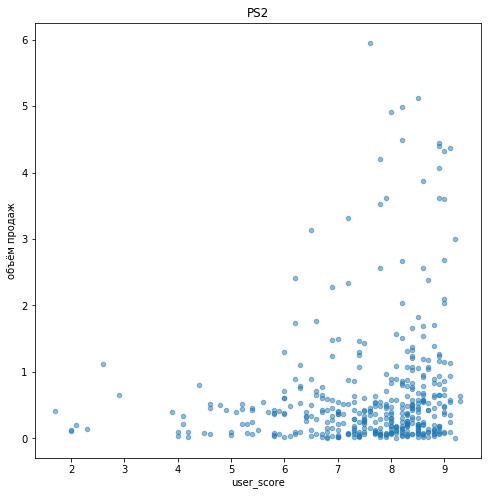

коэффициент корреляции продаж PS4 с оценкой критиков равен : 0.40357291073577817
коэффициент корреляции продаж PS4 с оценкой потребителей равен: -0.03088781296873357


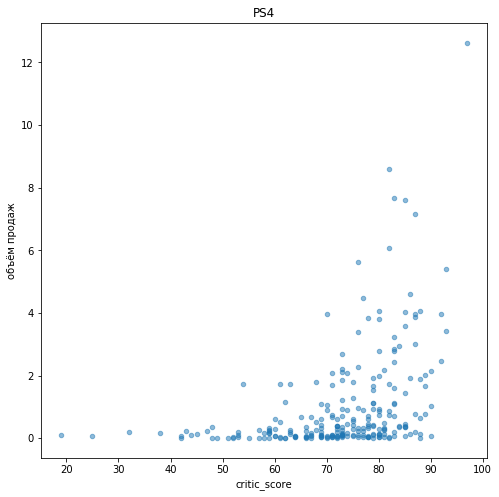

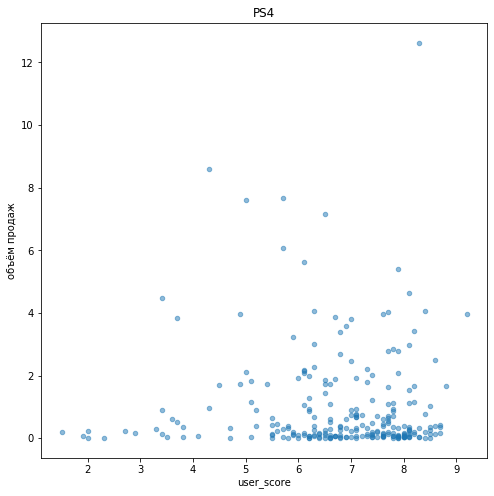

In [29]:
for platform in ['X360', 'Wii', 'PS2', 'PS4']:
    current_platform = current_df[current_df['platform'] == platform].dropna() 
    print('коэффициент корреляции продаж {0} с оценкой критиков равен : {1}'
          .format(platform, current_platform['total_sales'].corr(current_platform['critic_score'])))
    print('коэффициент корреляции продаж {0} с оценкой потребителей равен: {1}'\
          .format(platform, current_platform['total_sales'].corr(current_platform['user_score'])))
    for column in ['critic_score', 'user_score']:               
        current_platform.plot(kind='scatter', x=column, y='total_sales', figsize=(8, 8), alpha=0.5, title=platform)
        plt.ylabel('объём продаж')
        plt.show()

Картина выходит примерно та же: корреляция с оценкой критиков слабая, а корреляция с оценкой пользователей отсутствует. Только у Wii корреляция с оценкой критиков отсутствует. После 2005 года ps2 была на спаде популярности, поэтому даже слова критиков не меняли заинтересованность в играх платформы.  

Распределение игр по жанрам

In [30]:
genre_sales=current_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
genre_sales

,total_sales
genre,
Action,1202.04
Sports,853.34
Shooter,758.56
Misc,615.83
Role-Playing,550.78
Racing,355.03
Platform,303.06
Simulation,269.62
Fighting,208.07


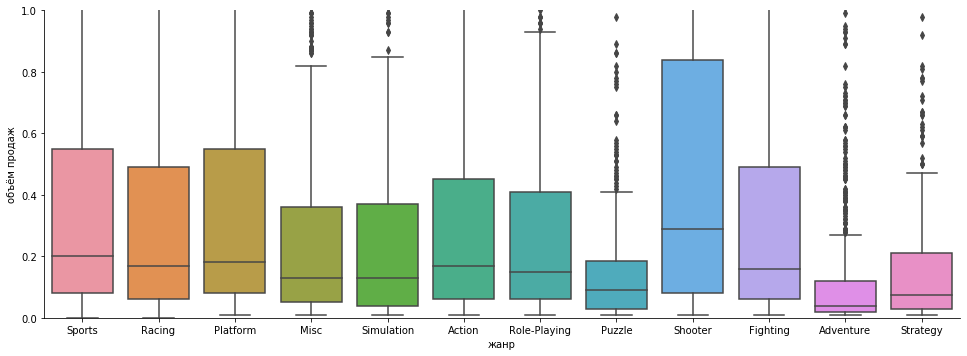

In [31]:
sns.catplot(x='genre', y="total_sales", kind="box", data=current_df, height=5, aspect=2.7)
plt.xlabel('жанр')
plt.ylabel('объём продаж')
ax = plt.ylim(0, 1)

Шутер находится на первом месте по средним продажам и является популярным жанром, так как имеет самый большой типичный разброс по продажам, доходящий до 0.8 млн копий. Затем по типичному разбросу идут игрут в жанрах спорт, платформер, файтинги, гонки и экшн-игры. У всех перечисленных игр примерно одинаковая медиана продаж - 0.2 млн копий. Наименьшей популярностью пользуются пазлы и приключения, но стоит заметить, что стоимость производства последних тоже невелика, в отличие от шутеров и экшн-игр. Но больше всего было произведено экшн-игр, за ними следуют спорт-игры и только затем шутеры, на последнем же месте находятся стратегии. Платформеры могут быть хорошим вложением денежных средств, потому что тоже, чаще всего, не требует невероятных вложений денег, а среднее количество продаж стоит на одном уровне с другими популярными жанрами.

# Шаг 4. Составить портрет пользователя для каждого региона

In [32]:
current_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [33]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    regions_gaming = current_df.pivot_table(index='genre', values=column, aggfunc='sum').\
    sort_values(column, ascending=False).head(5)
    regions_gaming['ratio'] = regions_gaming[column] / regions_gaming[column].sum()
    print(regions_gaming)

              na_sales     ratio
genre                           
Action          580.04  0.299396
Sports          432.70  0.223344
Shooter         400.96  0.206961
Misc            311.82  0.160950
Role-Playing    211.85  0.109349
         eu_sales     ratio
genre                      
Action     372.58  0.315105
Sports     265.61  0.224636
Shooter    248.07  0.209802
Misc       167.09  0.141314
Racing     129.05  0.109142
              jp_sales     ratio
genre                           
Role-Playing    179.60  0.399724
Action          108.39  0.241237
Misc             72.49  0.161336
Sports           52.51  0.116868
Platform         36.32  0.080835


В Америке и Европе самым популярным жанром стали экшн-игры, и отличие в этих регионах только в пятом месте -  в америке пятое место занимают рпг, а в европе гонки. Но очень интересно, что в японии на первом месте с большим отрывом стоят рпг, а на пятом месте стоят платформеры, которые не появились на первых местах в Европе и Америке.

In [34]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    regions_gaming = current_df.pivot_table(index='platform', values=column, aggfunc='sum').\
    sort_values(column, ascending=False).head(5)
    regions_gaming['ratio'] = regions_gaming[column] / regions_gaming[column].sum()
    print(regions_gaming)

          na_sales     ratio
platform                    
X360        595.74  0.291285
Wii         486.87  0.238054
PS3         390.13  0.190753
DS          371.98  0.181879
PS2         200.49  0.098029
          eu_sales     ratio
platform                    
PS3         327.21  0.277433
X360        268.32  0.227502
Wii         258.32  0.219023
DS          184.48  0.156416
PS4         141.09  0.119627
          jp_sales     ratio
platform                    
DS          171.35  0.347207
3DS         100.62  0.203886
PS3          79.41  0.160909
PSP          73.85  0.149642
Wii          68.28  0.138356


По платформам все регионы отличаются. В Америке самой популярной платформой является  x360, а на пятом месте находится PS2 , в то время как в Европе 5 место ушло на два поколения вперёд и играет на ps4. А на первом месте в Европе азиатская PS3. На первом месте  в Японии находится DS - может быть это связано с размером японских квартир и нежеланием искать под большую платформу место, ведь DS всегда можно носить в кармане или рюкзаке. Любопытно, что ps4 вообще не представлена на первых местах в Америке. Возможно, это связано с меньшей доступностью платформы в Америке в плане цены.

In [35]:
current_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Расшифруем, что означают разные рейтинги и приведём ссылку на источник:

https://www.esrb.org/ratings-guide/
    
E - для всех, E10+ - 10+ лет, T - teen - 13+ лет, M - mature - 17+ лет,  ao - adult only -  18+ лет , rp - rating pending - ещё не определён - можно считать nan

In [36]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    regions_gaming = current_df.pivot_table(index='rating', values=column, aggfunc='sum').\
    sort_values(column, ascending=False).head(4)
    regions_gaming['ratio'] = regions_gaming[column] / regions_gaming[column].sum()
    print(regions_gaming)

        na_sales     ratio
rating                    
E         873.10  0.379190
M         607.34  0.263770
T         479.08  0.208066
E10+      343.02  0.148975
        eu_sales     ratio
rating                    
E         508.71  0.373253
M         414.11  0.303843
T         258.17  0.189426
E10+      181.92  0.133479
        jp_sales     ratio
rating                    
E         147.33  0.454820
T          91.32  0.281913
M          46.23  0.142716
E10+       39.05  0.120551


Во всех трёх группах игры с рейтингом e - everyone, обладающего наименьшими ограничениями, стоят на первом месте по продажам, что и логично - они безопасны, поэтому и покупаются они для всех. В Америке и Европе результаты 2-4 мест не отличаются  и располагаются в таком порядке - M, T, E10+, в то время как в Японии 2 и 3 места сделали рокировку между собой по сравнению с другими регионами. 

# Шаг 5. Проверка гипотез

**Гипотеза №1.**

H0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.

α = 5 %

In [37]:
# Посмотрим на дисперсии выборок, чтобы понять, каким критерием пользоваться
variance_estimate_platform1 = np.var(current_df[current_df['platform']=='XOne']['user_score'], ddof=1)
print(variance_estimate_platform1)
variance_estimate_platform2 = np.var(current_df[current_df['platform']=='PC']['user_score'], ddof=1)
print(variance_estimate_platform2)

1.9069968429360695
2.2975488297286595


Дисперсии получили разные, поэтому будем выставлять параметр equal_var=False, чтобы воспользоваться критерием Уэлча

In [38]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(current_df[current_df['platform']=='XOne']['user_score'].dropna(),\
                       current_df[current_df['platform']=='PC']['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.002348015535956376
Отвергаем нулевую гипотезу


Не отвергаем гипотезу о разности рейтингов Xbox one и PC.

**Гипотеза №2.**

H0 — Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1 — Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

α = 5 %

In [39]:
# Посмотрим на дисперсии выборок, чтобы понять, каким критерием пользоваться
variance_estimate_genre1 = np.var(current_df[current_df['genre']=='Action']['user_score'], ddof=1)
print(variance_estimate_genre1)
variance_estimate_genre2 = np.var(current_df[current_df['genre']=='Sports']['user_score'], ddof=1)
print(variance_estimate_genre2)

1.868416255786837
2.6895357265172324


Дисперсии разные, применяем критерий Уэлча, используя equal_var=False.

In [40]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(current_df[current_df['genre']=='Action']['user_score'].dropna(),\
                       current_df[current_df['genre']=='Sports']['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.717661260563439e-09
Отвергаем нулевую гипотезу


Не отвергаем гипотезу о разности рейтингов жанров Action и Sports.

# Общий вывод

Теперь мы можем описать характеристики, на которые должна ориентироваться наша рекламная компания, чтобы быть наиболее успешной:
1. Игру нужно разрабатывать на разные платформы, если мы собираемся заниматься рекламой в Америке, Европе и Японии. Для Америки наиболее перспективной платформой будет xbox360, для Европы же остатся перспективной платформа PS3, Для Японии же лучшим выбором будет - 3DS, так как последняя ещё актуальна на данный момент, в то время как DS, имея больший процент продаж, не актуальна с 2014 года
2. Жанр - action для Европы и Америки, rpg - для Японии
3. Рейтинг ESRB - рейтинг E - для всех будет наилучшим вариантом,  так мы попадём в наибольшее количество групп. И в этом рейтинге возможны action - игры для Америки и Европы и rpg - для Японии. Для первых двух регионов возможно поддержать игру для групп 17+, а для Японии можно сузить возрастную группу до 13+, если будет вариант, стоящий возрастного сужения.
4. Оценки пользователей не имеют влияния на продажи игр, в то время как оценки критиков слабо, но всё же влияют. Это означает, что не будет лишним отправить парочку подарочных коллекционок крупным критикам:)